In [1]:
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
plt.rc('axes', labelsize=15) 

import seaborn as sns

import numpy as np
import pandas as pd

from src import config, data
from utils import *

In [2]:
default_cfg = config.SpriteWorldConfig()
default_cfg

SpriteWorldConfig(x=Range(min=0.1, max=0.9), y=Range(min=0.2, max=0.8), shape=['triangle', 'square'], scale=Range(min=0.09, max=0.22), angle=Range(min=0, max=0), c0=Range(min=0.05, max=0.95), c1=Range(min=1, max=1), c2=Range(min=1, max=1))

## Random Sampling

Generating images (sampling: random): 100%|███████████████████████████████████████| 1000/1000 [00:05<00:00, 171.46it/s]


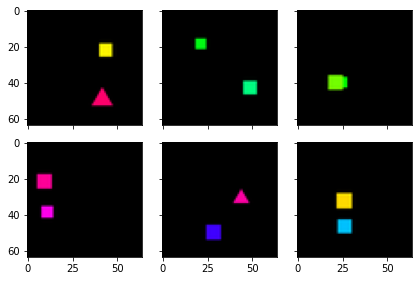

In [4]:
n_samples = 1000
n_slots = 2
sample_mode = "random"
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

Generating images (sampling: random): 100%|███████████████████████████████████████| 1000/1000 [00:08<00:00, 120.18it/s]


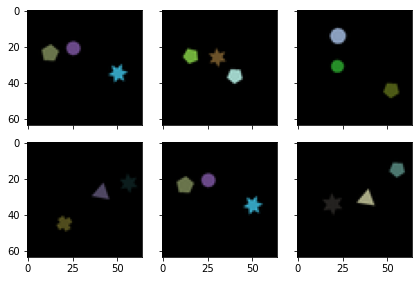

In [4]:
n_samples = 1000
n_slots = 3
random_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode)
plot_random_dataset_images(random_dataset)

## Diagonal Sampling

In [5]:
delta = 0.4
sample_mode = "diagonal"
for n_slots in [2, 3]:
    for no_overlap in [True, False]:
        diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, 
                                                 no_overlap=no_overlap,
                                                 delta=delta)
        import hui
        print(f"n_slots {n_slots}, no_overlap {no_overlap}")
        plot_random_dataset_images(diagonal_dataset)


Delta is too big for 'no_overlap' mode, setting it to 0.125.


Generating images (sampling: diagonal): 100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 161.15it/s]


ModuleNotFoundError: No module named 'hui'

In [23]:
obj_1 = []
obj_2 = []
for i in diagonal_dataset:
    obj_1.append(i[1][0][4])
    obj_2.append(i[1][1][4])

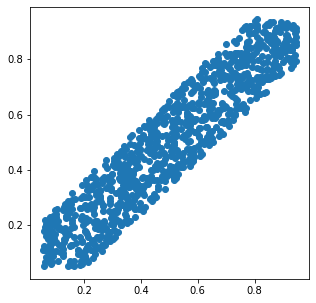

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(obj_1, obj_2)

## Off-Diagonal Sampling

Generating images (sampling: off_diagonal): 100%|█████████████████████████████████| 1000/1000 [00:06<00:00, 152.64it/s]


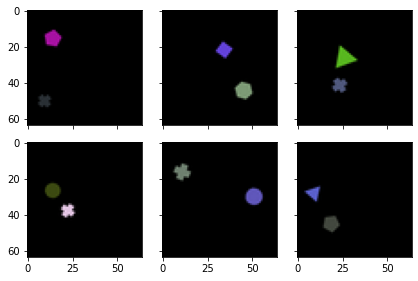

In [6]:
n_slots = 2
sample_mode = "off_diagonal"
delta = 0.2

off_diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta)
plot_random_dataset_images(off_diagonal_dataset)

Generating images (sampling: off_diagonal): 100%|█████████████████████████████████| 1000/1000 [00:08<00:00, 116.12it/s]


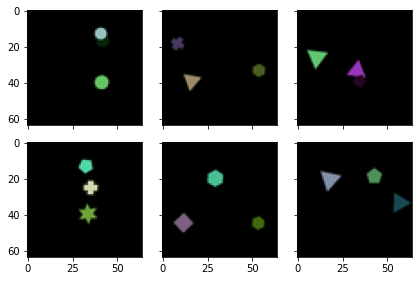

In [7]:
n_slots = 3
sample_mode = "off_diagonal"
delta = 0.1

off_diagonal_dataset = data.SpriteWorldDataset(n_samples, n_slots, default_cfg, sample_mode=sample_mode, delta=delta)
plot_random_dataset_images(off_diagonal_dataset)